In [6]:
import numpy as np
import sys
sys.path.append("..") 
import utils.funciones as fm
import matplotlib.pyplot as plt

**CARGANDO DATOS**

In [7]:
# VARIABLES
G_cnst = 4*(np.pi)**2  # Constante gravitacional (AU^3/(M_sun*año^2)))
dt_cnst = 0.0005
masa=np.array([
    1988410E24,     #Sol
    3.302E23,       #Mercurio
    48.685E23,      #Venus
    5.97219E24,      #Tierra
    6.4171E23,       #Marte
    18.9819E26,     #Jupiter
    5.6834E26,      #Saturno
    86.813E24,      #Urano
    102.409E24,     #Neptuno
    1.303E22        #Pluton
    ])/1988410E24

r = np.load(r"../resultados/posiciones.npz")['pos']
p = np.load(r"../resultados/momentos.npz")['mon']

print(r.shape, p.shape)

(2000001, 10, 3) (2000001, 10, 3)


El Hamiltoniano del sistema de $N=10$ cuerpos gravitacionales en tres dimensiones
se define como la suma de la energía cinética y la energía potencial,

$$
H(\mathbf{z}) = H(\mathbf{r},\mathbf{p}) = T(\mathbf{p}) + V(\mathbf{r}),
$$

donde el vector de estado es

$$
\mathbf{z} = (\mathbf{r},\mathbf{p}) \in \mathbb{R}^{60}.
$$

### Energía cinética

La energía cinética depende únicamente de los momentos lineales y se expresa como

$$
T(\mathbf{p}) = \sum_{i=1}^{10} \frac{\|\mathbf{p}_i\|^2}{2 m_i},
$$

con

$$
\mathbf{p}_i = (p_{x_i}, p_{y_i}, p_{z_i}) \in \mathbb{R}^3.
$$

### Energía potencial gravitacional

La energía potencial gravitacional depende únicamente de las posiciones y viene dada por

$$
V(\mathbf{r}) =
- \sum_{i=1}^{9} \sum_{j=i+1}^{10}
\frac{G \, m_i \, m_j}{\|\mathbf{r}_i - \mathbf{r}_j\|},
$$

donde

$$
\mathbf{r}_i = (x_i, y_i, z_i) \in \mathbb{R}^3.
$$

### Forma final del Hamiltoniano

Por tanto, el Hamiltoniano completo del sistema es

$$
H(\mathbf{r},\mathbf{p})
=
\sum_{i=1}^{10} \frac{\|\mathbf{p}_i\|^2}{2 m_i}
-
\sum_{i=1}^{9} \sum_{j=i+1}^{10}
\frac{G \, m_i \, m_j}{\|\mathbf{r}_i - \mathbf{r}_j\|}.
$$


In [8]:
Et , Ev = fm.Hamiltoniano_potencial(r, p, masa, G_cnst)
Ht = Ev + Et

print(Et.shape)

(2000001,)


**GRAFICA**

In [9]:

plt.rcParams.update({
    #Tipografía y tamaño de letra
    "font.size": 12,          #Tamaño general de la fuente
    "font.family": "serif",   #Fuente tipo "serif" (Times, etc.)
    
    #Ejes
    "axes.labelsize": 14,     #Tamaño de los labels de los ejes
    "axes.titlesize": 16,     #Tamaño del título del gráfico
    "axes.linewidth": 1.2,    #Grosor del borde de los ejes
    
    #Líneas
    "lines.linewidth": 2,     #Grosor de las líneas
    "lines.markersize": 6,    #Tamaño de los marcadores
    
    #Ticks
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "xtick.direction": "in",  #Hacer que las ticks vayan hacia dentro
    "ytick.direction": "in",
    "xtick.top": True,        #Mostrar ticks arriba
    "ytick.right": True,      #Mostrar ticks a la derecha
    
    #Leyenda
    "legend.fontsize": 12,
    "legend.frameon": False,  #Leyenda sin borde
    
    #Cuadrícula
    "grid.color": "gray",
    "grid.alpha": 0.3,
    "grid.linestyle": "--"
})

(2000001,)


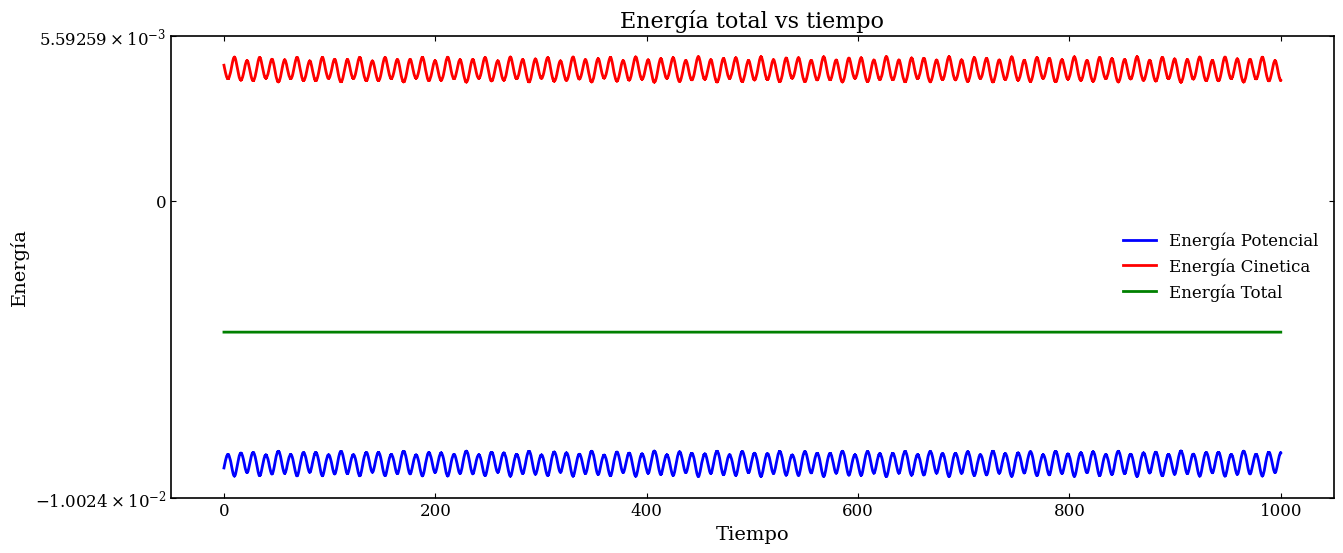

In [10]:
t = 1000
tiempo = np.arange(0, t+dt_cnst, dt_cnst)
print(tiempo.shape)
step=1
maxi=2000000
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(tiempo[:maxi:step],Ev[:maxi:step], "b-",label="Energía Potencial")
ax.plot(tiempo[:maxi:step],Et[:maxi:step], "r-",label="Energía Cinetica")
ax.plot(tiempo[:maxi:step],Ht[:maxi:step], "g-",label="Energía Total")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Energía")
ax.set_title("Energía total vs tiempo")
ax.set_yscale("symlog")
ax.legend(loc="best")
plt.show()